In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
from PIL import Image


In [19]:
A = np.array([[1, 2], [2, 4], [5, 7]])
A

array([[1, 2],
       [2, 4],
       [5, 7]])

In [20]:
U, d, VT = np.linalg.svd(A)

In [21]:
U

array([[-2.23705596e-01, -3.87241277e-01, -8.94427191e-01],
       [-4.47411192e-01, -7.74482553e-01,  4.47213595e-01],
       [-8.65897818e-01,  5.00220920e-01,  3.33066907e-16]])

In [22]:
VT

array([[-0.54881352, -0.83594481],
       [ 0.83594481, -0.54881352]])

In [23]:
d

array([9.92690023, 0.67576018])

In [24]:
np.diag(d)

array([[9.92690023, 0.        ],
       [0.        , 0.67576018]])

In [25]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[9.92690023, 0.        ],
       [0.        , 0.67576018],
       [0.        , 0.        ]])

In [26]:
np.dot(U, np.dot(D, VT))

array([[1., 2.],
       [2., 4.],
       [5., 7.]])

In [27]:
! wget https://raw.githubusercontent.com/joanby/DLTFpT/master/notebooks/oboe-with-book.jpg

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


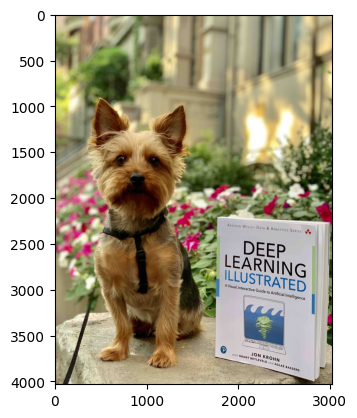

In [30]:
img = Image.open('oboe-with-book.jpg')
_ = plt.imshow(img)

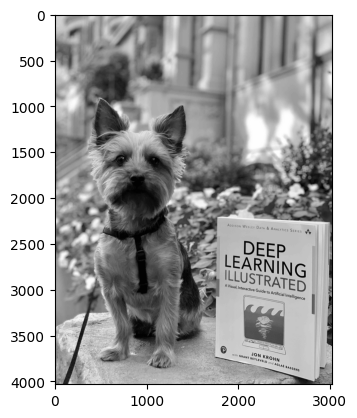

In [31]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

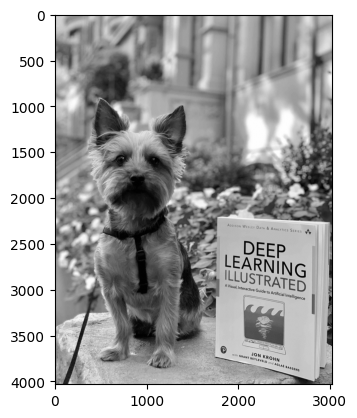

In [32]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

In [33]:
U, sigma, V = np.linalg.svd(imgmat)

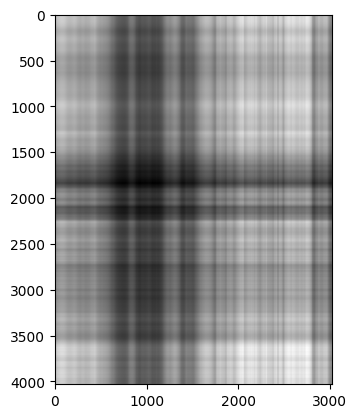

In [34]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

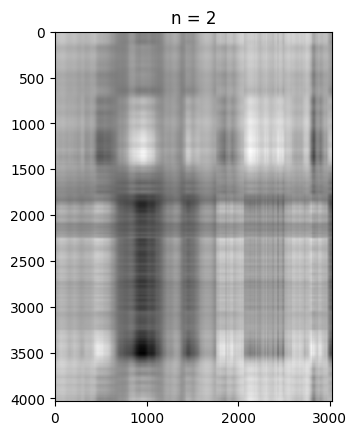

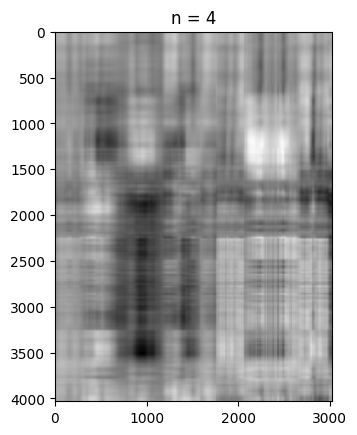

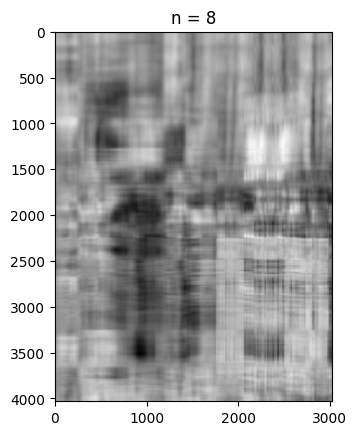

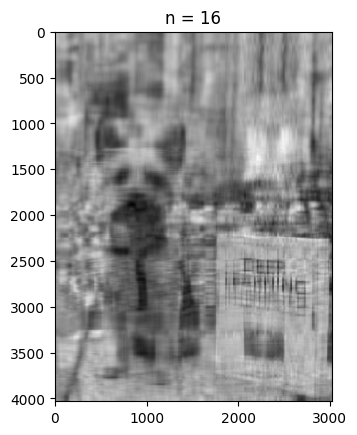

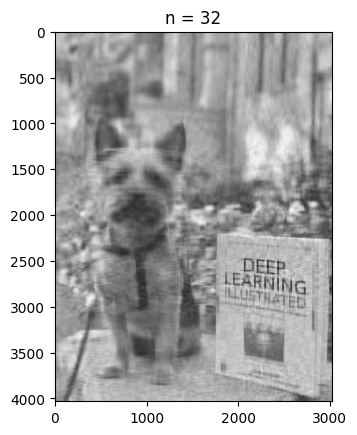

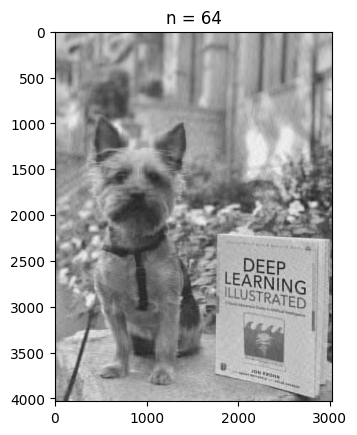

In [35]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [36]:
imgmat.shape

(4032, 3024)

In [37]:
full_representation = 4032*3024
full_representation

12192768

In [38]:
svd64_rep = 64*4032 + 64 + 64*3024
svd64_rep

451648

In [39]:
svd64_rep/full_representation

0.037042286050222556